# **Zomato Data Set EDA**


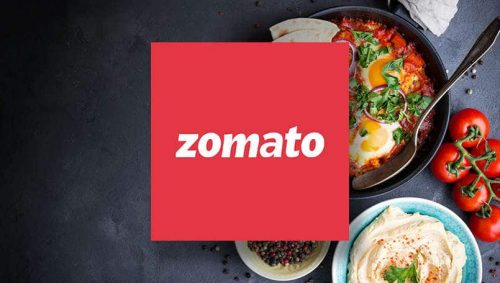


Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities.
>
More about [Zomato](https://en.wikipedia.org/wiki/Zomato)


Here's the outline of the project:

1. Download the dataset
2. Data preperation and cleaning
3. Data Analysis and visualization.
4. Questioning & Answering
5. Summary
6. Future work
6. References

#  **1. Downloading the DataSet**

This dataset is available on Kaggle. The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. 
>
DataSet Link - https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
>
**Data Description**

* url : This feature contains the url of the restaurant on the Zomato website
* address : This feature contains the address of the restaurant in Bangalore
* name : This feature contains the name of the restaurant
* online_order : whether online ordering is available in the restaurant or not
* book_table : table book option available or not
* rate : contains the overall rating of the restaurant out of 5
* votes : contains total number of upvotes for the restaurant
* phone : contains the phone number of the restaurant
* location : contains the neighborhood in which the restaurant is located
* rest_type : restaurant type
* ish_liked : dishes people liked in the restaurant
* cuisines : food styles, separated by comma
* approx_cost(for two people) : contains the approximate cost of meal for two people
* reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
* menu_item : contains list of menus available in the restaurant
* listed_in(type) : type of meal
* listed_in(city) : contains the neighborhood in which the restaurant is located









## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### [Opendatasets](https://github.com/JovianML/opendatasets)
`opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedazzaamahmed
Your Kaggle Key: ··········


100%|██████████| 89.0M/89.0M [00:00<00:00, 115MB/s]

In [ ]:
data_filename = './zomato-bangalore-restaurants/zomato.csv'

# **2. Data preperation and cleaning**

In [ ]:
df = pd.read_csv(data_filename) #Reading the CSV file
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape #Shape of the dataset. This dataset has 51717 rows and 17 columns

(51717, 17)

In [ ]:
df.columns #Viewing all the columns of the dataset

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
#Dropping the columns which are not usefull for us. Here we are dropping 'url', 'address', 'phone', 'menu_item', 'dish_liked' and 'reviews_list' columns.
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df.info() #info() gives us the information about the shape, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
df.drop_duplicates(inplace = True)#Dropping repeating values.
df.shape

(51609, 11)

In [ ]:
#Cleaning 'rate' Column
df['rate'].unique()#unique() is used to see all the unique values

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
# Let's write a function to remove "NEW" , "-" and "/5" from 'rate' Column.
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
#Let us fill the null values of rate column by replacing null values with the mean
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
df.dropna(inplace = True)#Dropping all the null values from the dataset
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
#Renaming the Columns as per Data Ethics
df.rename(columns = {'approx_cost(for two people)':'cost_2_people', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_people,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
#Dropping the 'Listed in(city)' as there is 'location'
df = df.drop(['listed_in(city)'], axis = 1)

In [ ]:
df['cost_2_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
#Let's write a function to remove ',' from 'cost_2_plate' column.
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['cost_2_people'] = df['cost_2_people'].apply(handlecomma)
df['cost_2_people'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_people,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
#Cleaning 'rest_type' Column
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [ ]:
#Let us write a function to make 'rest_type' with frequency less than 1000 as 'others'.
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [ ]:
#Cleaning 'location' column
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [ ]:
#Cleaning 'cuisines' column
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_lessthan100 = cuisines[cuisines<100]

#Let us write a function to make 'cuisines' with frequency less than 100 as 'others'.

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_people,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


Data is Clean, Lets jump to Visualization

# **3. Data Visualisation**

## Total No. of Restaurants based on Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants based on Location')

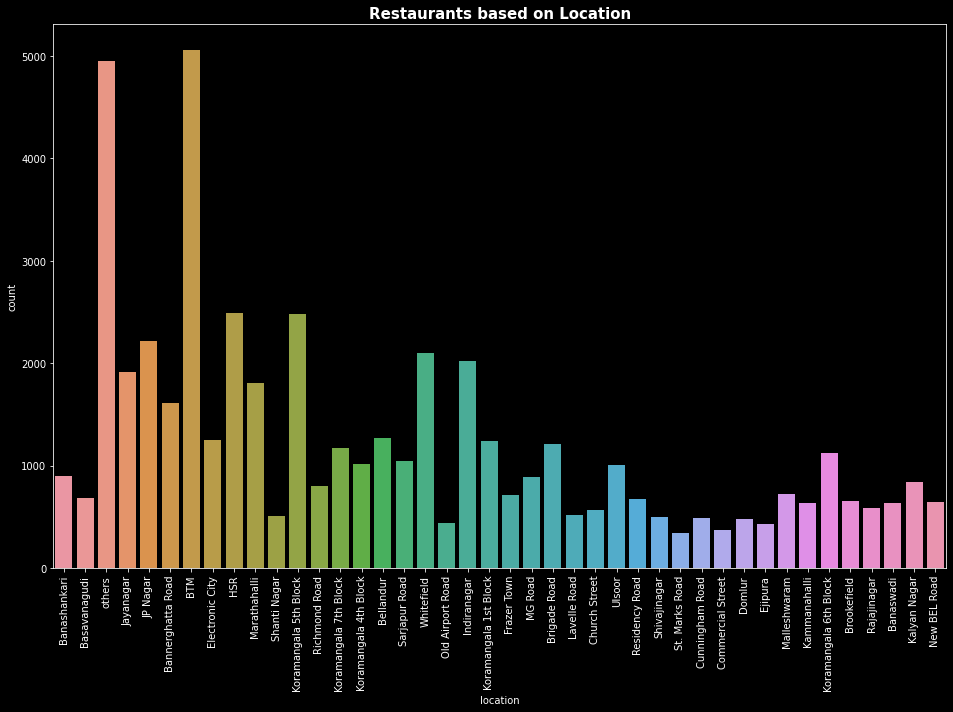

In [ ]:
#Let us plot a graph of Total No. of Restaurants vs Location
plt.figure(figsize = (16,10))#Setting the size of the plot
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.title("Restaurants based on Location",size= 15,fontweight='bold')

By the above graph we can clearly say that there are lot of restaurants in BTM layout.

## Restaurants Average Cost for 2 people

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


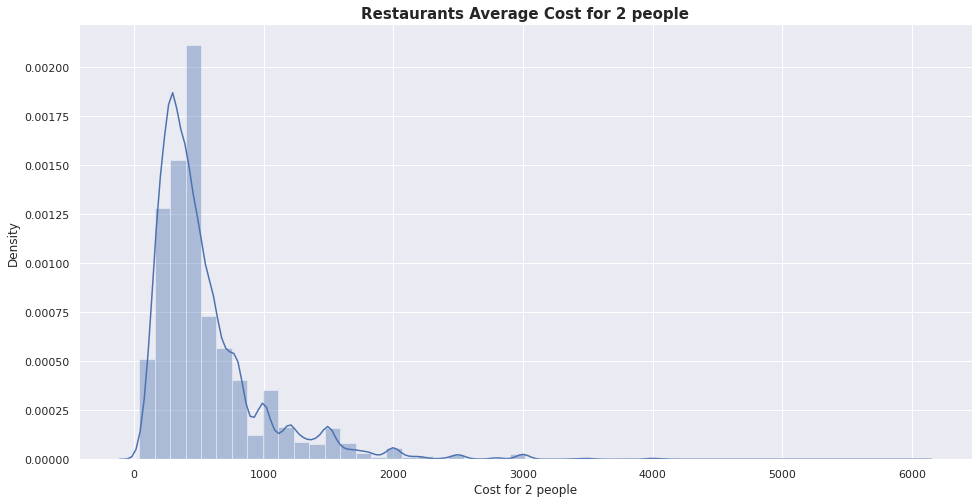

In [ ]:
sns.set(rc={"figure.figsize": (16,8 )});
sns.distplot(df.cost_2_people)
plt.xlabel('Cost for 2 people')
plt.title("Restaurants Average Cost for 2 people",size= 15,fontweight='bold')
plt.show()

By the above plot we can clearly say that average cost for two people is less than 1000 Rs. in most of the restaurants in bangalore.

## Total No. of Restaurants that accept online orders

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Accepting Online Order')

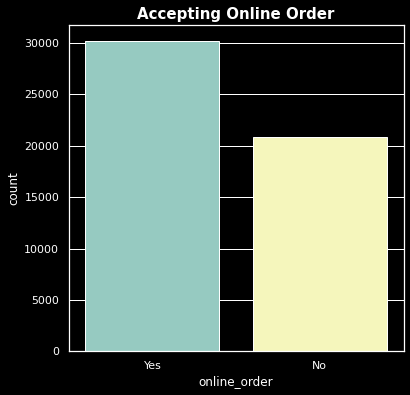

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'])
plt.title("Accepting Online Order",size= 15,fontweight='bold')

By the above plot we can clearly say that the ratio of restaurants accepting online order is higher than restaurants not accepting online order in bangalore. 

## Rating of Restaurants based on whether they accept online order or not

Text(0.5, 1.0, 'Ratings of Restaurants')

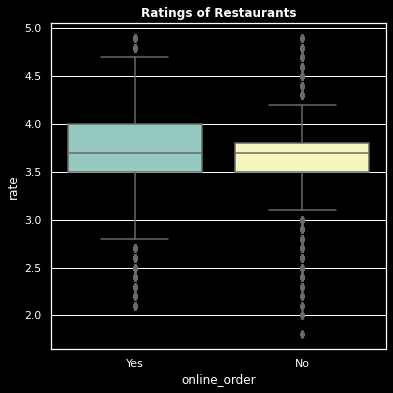

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.title("Ratings of Restaurants",fontweight='bold')

## Rating of Restaurants based on whether they have the facility of booking table

Text(0.5, 1.0, 'Ratings based on Accepting Booktable')

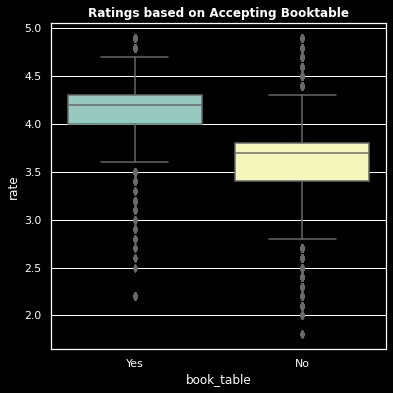

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)
plt.title("Ratings based on Accepting Booktable",fontweight='bold')

This clearly states that the restaurants which have the facility of 'booking table' have higher rating compared to the restaurants that so not have the facility of 'booking table'.

## Online Order Facility based on Location

In [ ]:
df1 = df.groupby(['location','online_order'])['name'].count()#groupby() is used for grouping the data according to the categories
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1.head()

name      
online_order         No   Yes
location                     
BTM                1763  3293
Banashankari        397   505
Banaswadi           302   338
Bannerghatta Road   685   924
Basavanagudi        243   441

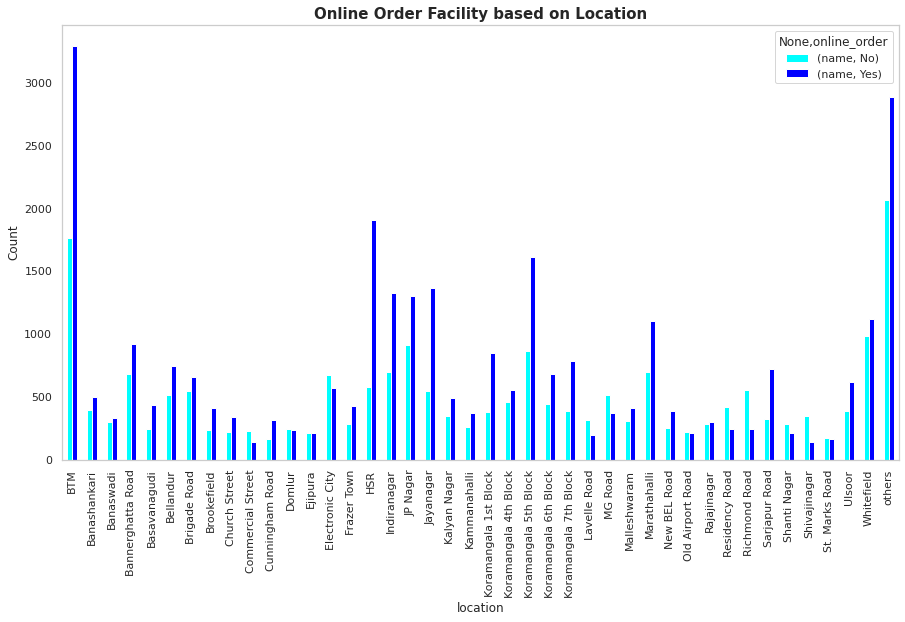

In [ ]:
df1.plot(kind = 'bar', color = ['cyan', 'blue'],figsize = (15,8))
plt.title("Online Order Facility based on Location",size=15,fontweight='bold')
plt.ylabel("Count")
new_style = {'grid': False}
plt.rc('axes', **new_style)

## Percentage of Restaurant according to their type

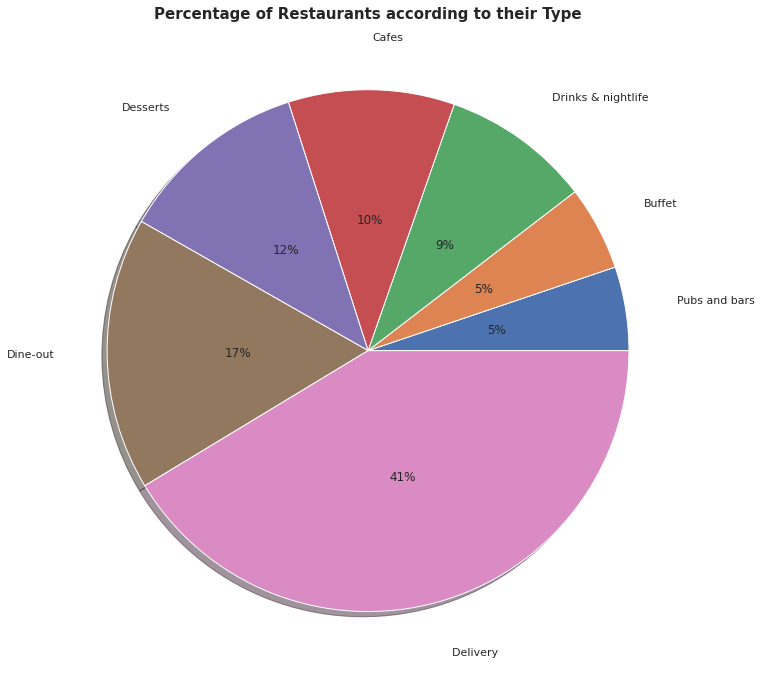

In [ ]:
restaurantTypeCount=df['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
plt.pie(slices, labels=labels,autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type",size= 15,fontweight='bold')

fig.set_size_inches(12,12)
plt.show()

By this pie chart we can clearly say that 'Delivery' restaurants have 41% weightage in  Benagluru.

## No. of Votes based on Location

In [ ]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Votes based on Location')

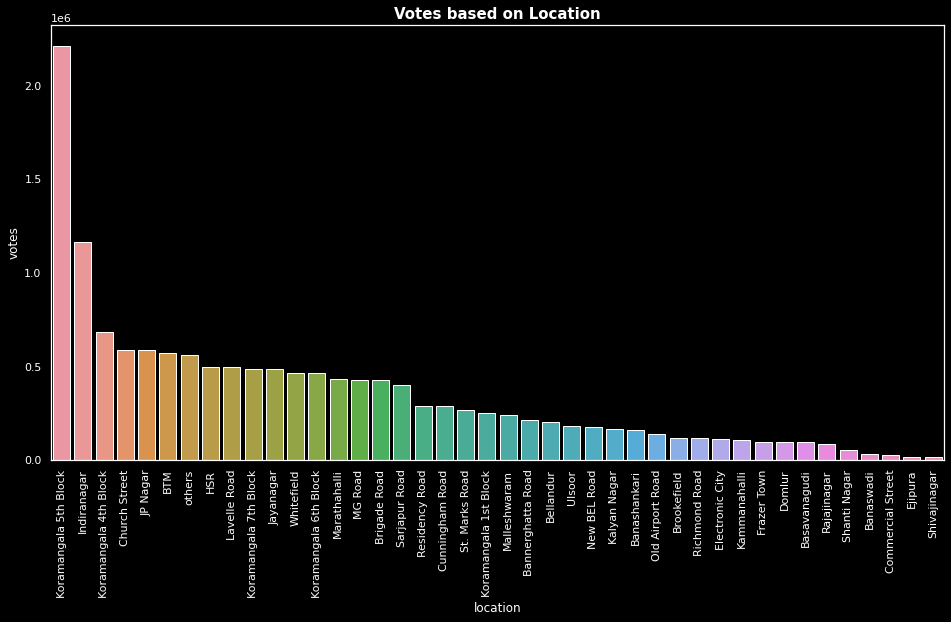

In [ ]:
plt.figure(figsize = (16,8))
sns.barplot(df5.index , df5['votes'])
plt.xticks(rotation = 90)
plt.style.use('dark_background')
plt.title('Votes based on Location',size=15,fontweight='bold')

By this we can say that there are lot of good restaurants in Koramangala 5th Block as it has the highest upvotes. After Koramangala 5th Block Indiranagar has good restaurants.

# **4. Questioning & Answering**
We've already gained some insights about the zomato data by exploring individual columns of the dataset. 

Let's ask some specific questions and try to answer them using data frame operations and visualizations.


1. **Which are the top locations to open a Restaurant which have less compentency?**
2. **Which type of Restaurants have higher ratings?**
3. **Does most of the restaurant have the facility of booking table?**
4. **Which are the most famous restaurant chains in Bengaluru?**
5. **Which type of Restaurants are more in Bengaluru?**
6. **What is the average rating of Restaurants in Bengaluru?**
7. **What is the average cost of restaurants at each location?**
8. **What is the average ratings of the restaurants at each location?**


1. **Which are the top locations to open a Restaurant which have less compentency?**


For this we need to get the locations where there are less no. of restaurant.

Below is the plot of locations where there are very few Restaurants.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


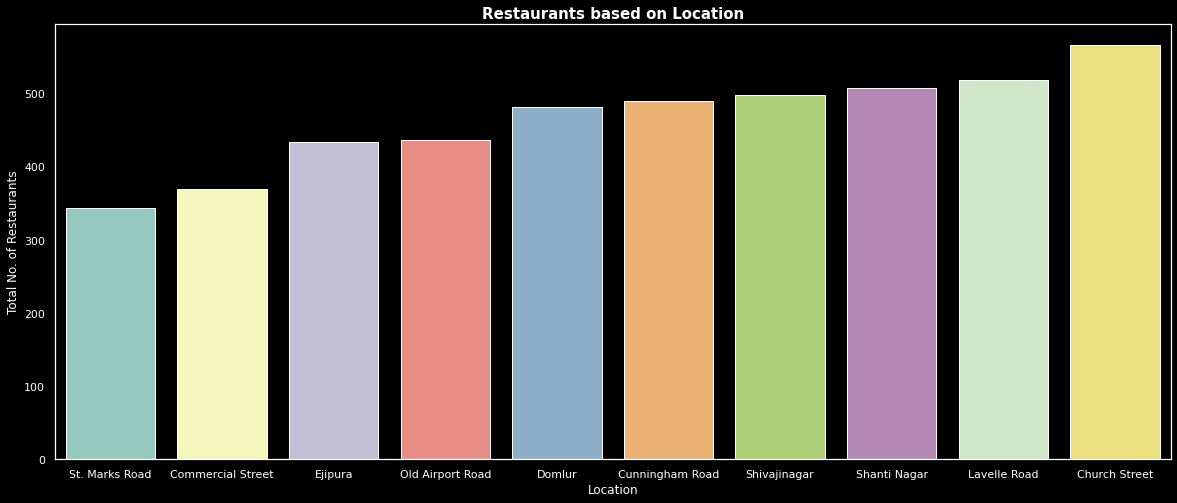

In [ ]:
no_of_rest = df.groupby("location")["name"].count().nsmallest(10)
plt.figure(figsize=(20,8))
sns.barplot( no_of_rest.index, no_of_rest )
plt.title('Restaurants based on Location',size=15,fontweight='bold')
plt.ylabel('Total No. of Restaurants')
plt.xlabel('Location')
plt.show()

By this plot we can clearly say that St. Marks, Commercial Street, Ejipura, etc are the locations where there are very few restaurants. so it can be the best place to open a restaurant if you are looking for less competency. 

2. **Which type of Restaurants have higher ratings?**

Text(0.5, 1.0, 'Ratings based on Type')

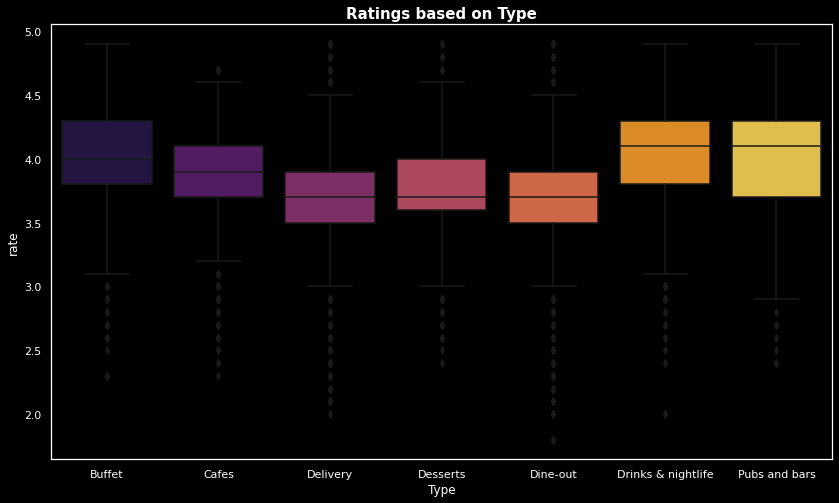

In [ ]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')
plt.title('Ratings based on Type',size=15,fontweight='bold')

This box plot clearly shows us that 'Drinks & nightlife' and 'Pubs and bars' are the two type of restaurants in bangalore which have highest rating.

3. **Does most of the restaurant have the facility of booking table?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Book Table')

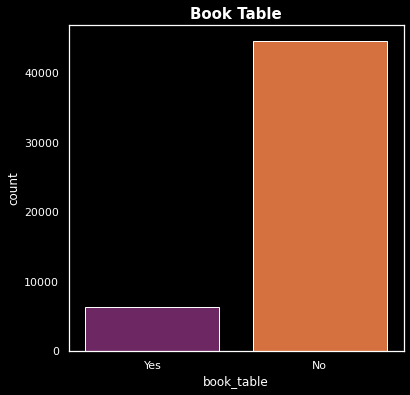

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'inferno')
plt.title('Book Table',size=15,fontweight='bold')

By this we can clearly say that not all the restaurants have the facility of booking table. Only few restaurants in bangalore have the facility of booking table.

4. **Which are the most famous restaurant chains in Bengaluru?**

Text(0, 0.5, 'Restaurant Chains')

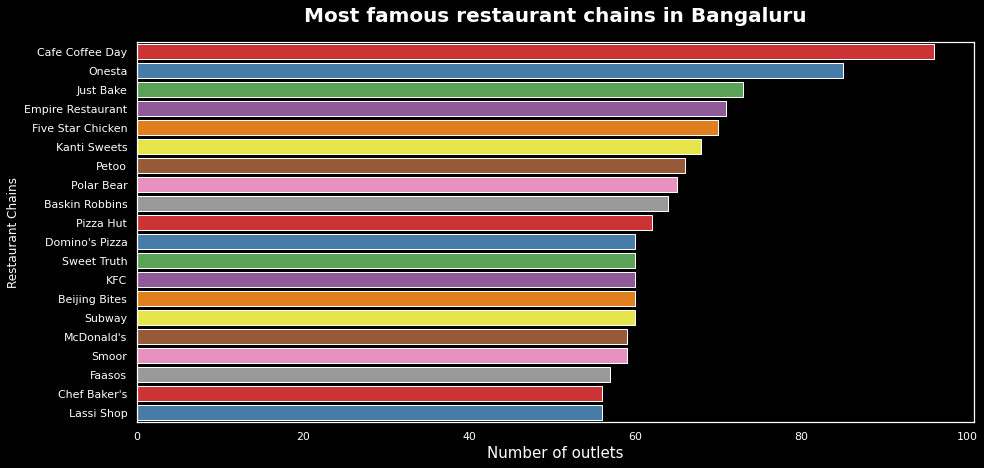

In [ ]:
plt.figure(figsize=(15,7))
chains= df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20,fontweight='bold')
plt.xlabel("Number of outlets",size=15)
plt.ylabel('Restaurant Chains')


Cafe Coffee Day followed by Onesta followed by Just Bake have the most outlets in Bangalore.

5. **Which type of Restaurants are more in Bengaluru?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


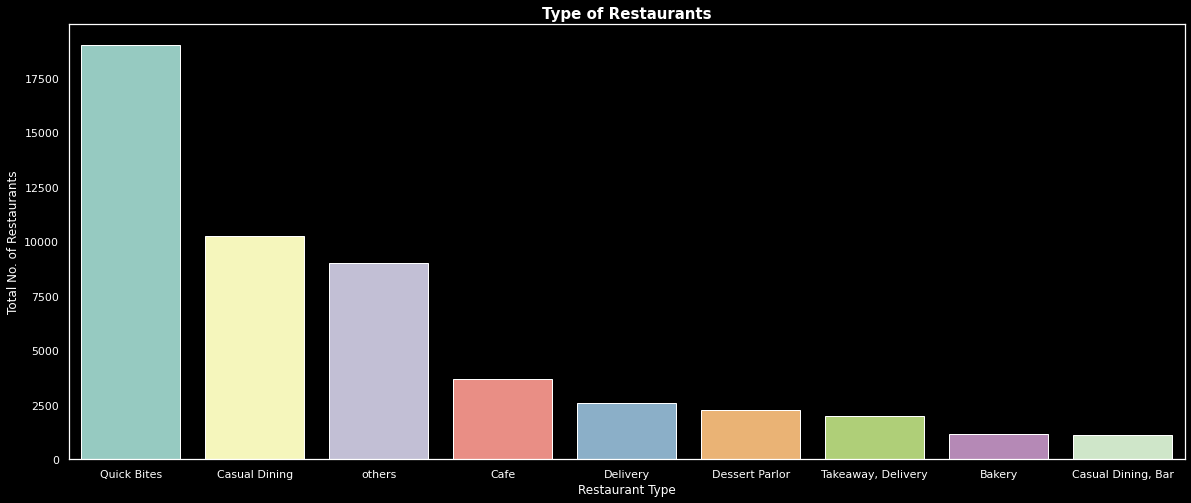

In [ ]:
rest = df.groupby("rest_type")["name"].count().nlargest(10)
plt.figure(figsize=(20,8))
sns.barplot( rest.index, rest )
plt.ylabel('Total No. of Restaurants')
plt.xlabel('Restaurant Type')
plt.title('Type of Restaurants',size=15,fontweight='bold')
plt.show()

Quick bites are more in banglore based on above graph.

6. **What is the average rating of Restaurants in Bengaluru?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



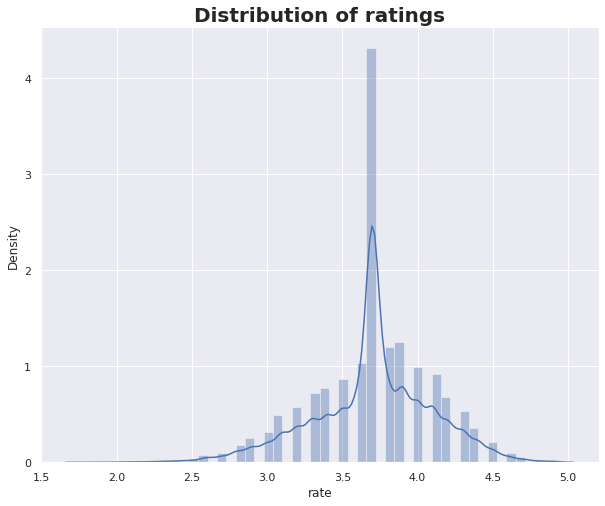

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['rate'])
plt.title("Distribution of ratings", fontsize=20, fontweight='bold')
plt.show()

The average rating of restaurants in Bangalore is between 3.5 and 4.0 out 5 which is really acceptable.

7. **What is the average cost of restaurants at each location?**

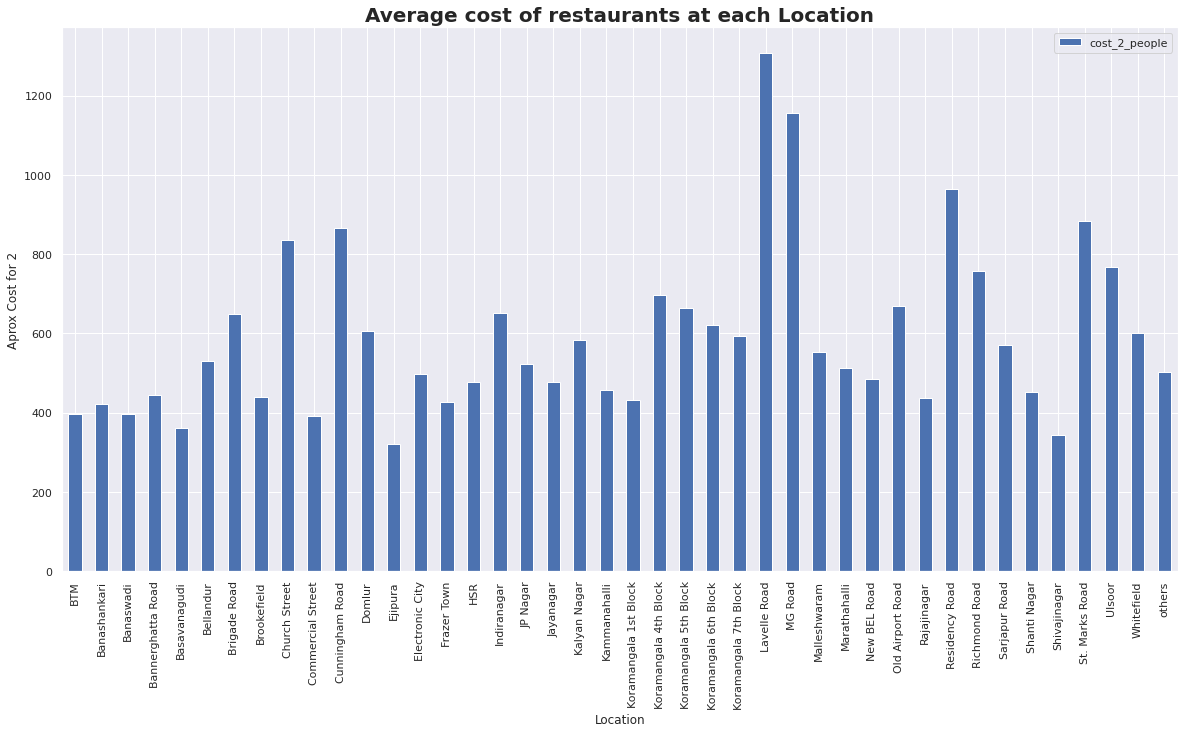

In [ ]:
a = df.groupby('location').agg({'cost_2_people':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar')
plt.title('Average cost of restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Aprox Cost for 2")
plt.legend()
plt.show()

We can see that Lavelle Road and MG Road are the places where average food cost for two people is high campared to others. The average cost for two people here is more than 1000 Rs. 


Shivajinagar and Ejipura are the two places where the average cost for two people is less compared to other places.

8. **What is the average rating of restaurants at each location?**

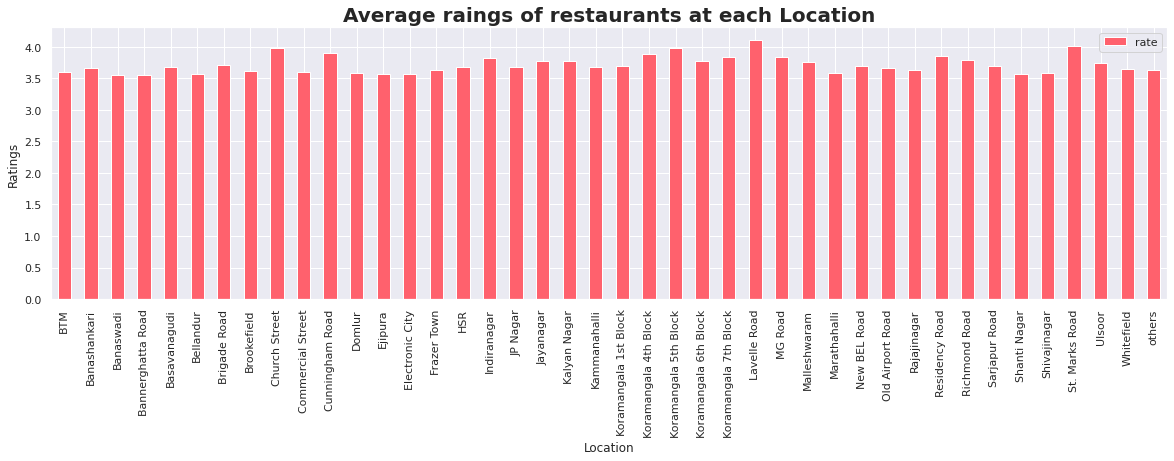

In [ ]:
b = df.groupby('location').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (20,5)
b.plot(kind='bar',color='#FF616D')
plt.title('Average raings of restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Ratings")
plt.legend()
plt.show()

Lavelle Lake, St. Marks Road and Church Street are the three locatons where the average rating of restaurants higher than other restaurants.


Bannerghatta road and Banaswadi are the two places where the average rating of restaurants is less compared to other places in Banaglore

# **5. Summary**


The Exploratory Data Analysis on Zomato Bangalore Restaurants dataset is completed. Here are the outline's that we have followed:

- Downloaded the dataset from Kaggle
- Processed dirty data by cleaning, modifying to prepare a data frame ready for analysis.
- Once done with data preprocessing started analyzing the data and got a good picture of it.
- Asked and answered few interesting questions.

> The following are the observations have been noticed during Exploratory Analysis:
1. There are lot of restaurants in BTM layout campared to any other places in bangalore.
2. The average cost for two people is less than 1000 Rs. in most of the restaurants in bangalore.
3. The ratio of restaurants accepting online order is higher than restaurants not accepting online order in bangalore.
4. The restaurants which have the facility of 'booking table' have higher rating compared to the restaurants that so not have the facility of 'booking table'.
5.  There are more 'Delivery' type of restaurants. 'Delivery' type restaurants have 41% weightage in Benagluru.
6. We can find good restaurants in Koramangala 5th Block as it has the highest upvotes. After Koramangala 5th Block Indiranagar has good restaurants.
7. 'Drinks & nightlife' and 'Pubs and bars' are the two type of restaurants in bangalore which have highest rating.
8. The average rating of restaurants in Bangalore is between 3.5 and 4.0 out 5.
9. Lavelle Road and MG road are the two places where we can find expensive restaurants in Bangalore.



# **6. Future work**

- Interactive Visualisations can be done using [Plotly](https://plotly.com/) and [Folium](http://python-visualization.github.io/folium/) Library.
- We can do a prediction on success of restaurant.

# **7. References**

Zomato Dataset : https://www.kaggle.com/code/akshitmadan/zomato-data-set-analysis-visualization/data

Exploratory Data Analysis : https://en.wikipedia.org/wiki/Exploratory_data_analysis

Pandas Documentation: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

Jovian Youtube : https://www.youtube.com/c/JovianML